# Deep Convolutional Neural Network for Sentiment Analysis

# Data Preparation

In [1]:
from nltk.corpus import stopwords
import string

### Loading and Cleaning Reviews

In [2]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [3]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

### Define a Vocabulary

In [4]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [5]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

In [6]:
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [7]:
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('txt_sentoken/neg', vocab, True)
process_docs('txt_sentoken/pos', vocab, True)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('bad', 1248), ('could', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [8]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

25767


In [9]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()

In [10]:
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

# Train Embedding Layer

In [26]:
from string import punctuation
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [27]:
# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

In [28]:
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc, vocab)
        # add to list
        documents.append(tokens)
    return documents

In [29]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [30]:
# load all training reviews
positive_docs = process_docs('txt_sentoken/pos', vocab, True)
negative_docs = process_docs('txt_sentoken/neg', vocab, True)
train_docs = negative_docs + positive_docs

In [31]:
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)

In [32]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])

In [33]:
# load all test reviews
positive_docs = process_docs('txt_sentoken/pos', vocab, False)
negative_docs = process_docs('txt_sentoken/neg', vocab, False)
test_docs = negative_docs + positive_docs
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

In [34]:
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

- Convolutional Layer (32 filters, kernel size of 8, ReLU activation)
- Pooling Layer (reduces feature map size by half)
- Flatten Layer (flattens the 2D output to a 1D vector)
- Dense Layers (MLP for feature interpretation, details not specified)
- Output Layer (1 neuron, sigmoid activation for binary classification)

In [35]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1317, 100)         2576800   
                                                                 
 conv1d (Conv1D)             (None, 1310, 32)          25632     
                                                                 
 max_pooling1d (MaxPooling1  (None, 655, 32)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 20960)             0         
                                                                 
 dense (Dense)               (None, 10)                209610    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                     

In [36]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# fit network
history = model.fit(Xtrain, ytrain, epochs=10, verbose=2)

Epoch 1/10


57/57 - 3s - loss: 0.6937 - accuracy: 0.4789 - 3s/epoch - 45ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6886 - accuracy: 0.5233 - 1s/epoch - 25ms/step
Epoch 3/10
57/57 - 1s - loss: 0.5365 - accuracy: 0.7267 - 1s/epoch - 24ms/step
Epoch 4/10
57/57 - 1s - loss: 0.3626 - accuracy: 0.9506 - 1s/epoch - 23ms/step
Epoch 5/10
57/57 - 1s - loss: 0.3101 - accuracy: 0.9917 - 1s/epoch - 24ms/step
Epoch 6/10
57/57 - 1s - loss: 0.2892 - accuracy: 0.9956 - 1s/epoch - 24ms/step
Epoch 7/10
57/57 - 1s - loss: 0.2743 - accuracy: 0.9961 - 1s/epoch - 24ms/step
Epoch 8/10
57/57 - 1s - loss: 0.2610 - accuracy: 0.9967 - 1s/epoch - 25ms/step
Epoch 9/10
57/57 - 1s - loss: 0.2492 - accuracy: 0.9967 - 1s/epoch - 24ms/step
Epoch 10/10
57/57 - 1s - loss: 0.2380 - accuracy: 0.9972 - 1s/epoch - 24ms/step


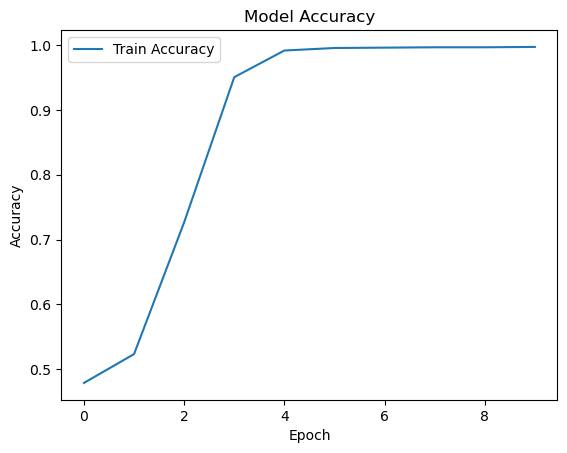

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')

# Ajoutez le titre et les étiquettes
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Ajoutez une légende
plt.legend()

# Montrez le graphique
plt.show()

In [39]:
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 82.999998


# Train word2vec Embedding

In [46]:
from string import punctuation
from os import listdir
from gensim.models import Word2Vec

In [47]:
# turn a doc into clean tokens
def doc_to_clean_lines(doc, vocab):
    clean_lines = list()
    lines = doc.splitlines()
    for line in lines:
        # split into tokens by white space
        tokens = line.split()
        # remove punctuation from each token
        table = str.maketrans('', '', punctuation)
        tokens = [w.translate(table) for w in tokens]
        # filter out tokens not in vocab
        tokens = [w for w in tokens if w in vocab]
        clean_lines.append(tokens)
    return clean_lines

In [48]:
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        doc = load_doc(path)
        doc_lines = doc_to_clean_lines(doc, vocab)
        # add lines to list
        lines += doc_lines
    return lines

In [49]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [50]:
# load training data
positive_docs = process_docs('txt_sentoken/pos', vocab, True)
negative_docs = process_docs('txt_sentoken/neg', vocab, True)
sentences = negative_docs + positive_docs
print('Total training sentences: %d' % len(sentences))

Total training sentences: 58109


In [52]:
# train word2vec model
model = Word2Vec(sentences, vector_size=100, window=5, workers=8, min_count=1)

In [54]:
words = list(model.wv.key_to_index.keys())
print('Vocabulary size: %d' % len(words))


Vocabulary size: 25767


In [55]:
# save model in ASCII (word2vec) format
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

# Use Pre-trained Embedding

In [70]:

from string import punctuation
from os import listdir
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D


In [71]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [72]:
# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

In [81]:
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc, vocab)
        # add to list
        documents.append(tokens)
    return documents

In [82]:
# load embedding as a dict
def load_embedding(filename):
    # load embedding into memory, skip first line
    file = open(filename,'r')
    lines = file.readlines()[1:]
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = asarray(parts[1:], dtype='float32')
    return embedding

In [83]:
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix


In [84]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [85]:
# load all training reviews
positive_docs = process_docs('txt_sentoken/pos', vocab, True)
negative_docs = process_docs('txt_sentoken/neg', vocab, True)
train_docs = negative_docs + positive_docs

In [86]:
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)

In [87]:
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])



In [88]:
# load all test reviews
positive_docs = process_docs('txt_sentoken/pos', vocab, False)
negative_docs = process_docs('txt_sentoken/neg', vocab, False)
test_docs = negative_docs + positive_docs
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])



In [89]:
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

In [90]:
# load embedding from file
raw_embedding = load_embedding('embedding_word2vec.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=max_length, trainable=False)

In [91]:
# define model
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1317, 100)         2576800   
                                                                 
 conv1d_1 (Conv1D)           (None, 1313, 128)         64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 656, 128)          0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 83968)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 83969     
                                                                 
Total params: 2724897 (10.39 MB)
Trainable params: 148097 (578.50 KB)
Non-trainable params: 2576800 (9.83 MB)
__________

In [92]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [93]:
# fit network
history = model.fit(Xtrain, ytrain, epochs=10, verbose=2)


Epoch 1/10
57/57 - 2s - loss: 0.7055 - accuracy: 0.5189 - 2s/epoch - 35ms/step
Epoch 2/10
57/57 - 2s - loss: 0.6640 - accuracy: 0.5889 - 2s/epoch - 27ms/step
Epoch 3/10
57/57 - 1s - loss: 0.5714 - accuracy: 0.7050 - 1s/epoch - 25ms/step
Epoch 4/10
57/57 - 2s - loss: 0.4365 - accuracy: 0.8078 - 2s/epoch - 27ms/step
Epoch 5/10
57/57 - 2s - loss: 0.3309 - accuracy: 0.8700 - 2s/epoch - 28ms/step
Epoch 6/10
57/57 - 2s - loss: 0.2180 - accuracy: 0.9289 - 2s/epoch - 29ms/step
Epoch 7/10
57/57 - 1s - loss: 0.1347 - accuracy: 0.9767 - 1s/epoch - 26ms/step
Epoch 8/10
57/57 - 2s - loss: 0.0773 - accuracy: 0.9939 - 2s/epoch - 28ms/step
Epoch 9/10
57/57 - 2s - loss: 0.0450 - accuracy: 1.0000 - 2s/epoch - 28ms/step
Epoch 10/10
57/57 - 2s - loss: 0.0275 - accuracy: 1.0000 - 2s/epoch - 27ms/step


In [94]:
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 57.499999


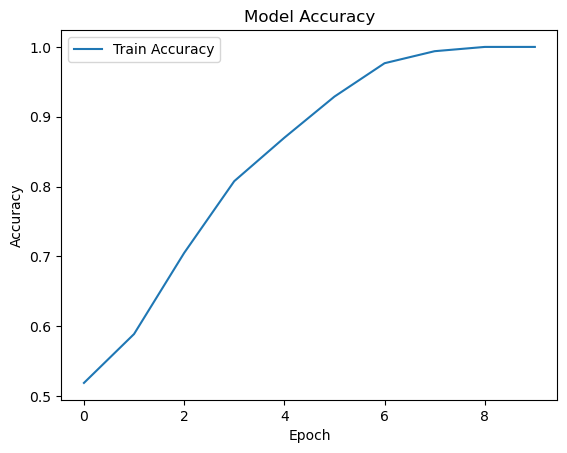

In [95]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')

# Ajoutez le titre et les étiquettes
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Ajoutez une légende
plt.legend()

# Montrez le graphique
plt.show()

==> The results show that the training dataset was learned successfully, but evaluation on the test dataset was very poor, at just above 50% accuracy.

The cause of the poor test performance may be because of the chosen word2vec configuration or the chosen neural network configuration.